### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

#1. Análise do faturamento


In [18]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento_lojas_lista = []

def faturamento_lojas(parametro1):
  ''' Função que retorna o faturamento total de cada loja.

  parametro1: dataframe

  return faturamento: float

    Um float que representa o faturamento total de cada loja.
  '''
  faturamento = sum(parametro1['Preço'])
  return int(faturamento)

faturamento_lojas_lista.append(faturamento_lojas(loja))
faturamento_lojas_lista.append(faturamento_lojas(loja2))
faturamento_lojas_lista.append(faturamento_lojas(loja3))
faturamento_lojas_lista.append(faturamento_lojas(loja4))

print(faturamento_lojas_lista)

media_faturamento = sum(faturamento_lojas_lista) / len(faturamento_lojas_lista)
print(f'A média de faturamento é de {media_faturamento}')

[1534509, 1488459, 1464025, 1384497]
A média de faturamento é de 1467872.5


# 2. Vendas por Categoria


In [5]:
def qtd_categoria(parametro1):
  ''' Função que retorna a quantidade de vendas por categoria em ordem das categorias mais populares para as menos populares.

  parametro1: dataframe

  return total_vendas_ordenadas: dict
    Um dicionário onde as chaves são as categorias de produtos e os valores são as quantidades
    de vendas, ordenados do maior para o menor.
  '''
  categoria_loja = set(parametro1['Categoria do Produto'])
  total_vendas = {}
  for categoria in categoria_loja:
    quantidade = parametro1['Categoria do Produto'].value_counts()[categoria]
    total_vendas[categoria] = int(quantidade)
    total_vendas_ordenadas = dict(sorted(total_vendas.items(), key=lambda item: item[1], reverse=True))
  return total_vendas_ordenadas

resultado_loja = (qtd_categoria(loja))
resultado_loja2 = (qtd_categoria(loja2))
resultado_loja3 = (qtd_categoria(loja3))
resultado_loja4 = (qtd_categoria(loja4))
print(resultado_loja)
print(resultado_loja2)
print(resultado_loja3)
print(resultado_loja4)

{'moveis': 465, 'eletronicos': 448, 'brinquedos': 324, 'eletrodomesticos': 312, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades domesticas': 171}
{'moveis': 442, 'eletronicos': 422, 'brinquedos': 313, 'eletrodomesticos': 305, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades domesticas': 181}
{'moveis': 499, 'eletronicos': 451, 'brinquedos': 315, 'eletrodomesticos': 278, 'esporte e lazer': 277, 'livros': 185, 'instrumentos musicais': 177, 'utilidades domesticas': 177}
{'moveis': 480, 'eletronicos': 451, 'brinquedos': 338, 'esporte e lazer': 277, 'eletrodomesticos': 254, 'utilidades domesticas': 201, 'livros': 187, 'instrumentos musicais': 170}


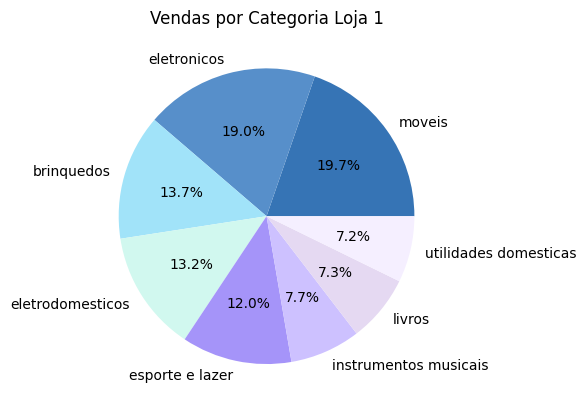

In [6]:
cores = ['#3674B5', '#578FCA', '#A1E3F9', '#D1F8EF', '#A594F9', '#CDC1FF', '#E5D9F2', '#F5EFFF']

def vendas_categoria_grafico(parametro1, parametro2):
  ''' Função que cria um gráfico de pizza com as vendas por categoria.

  parametro1: dict resultado_loja (inserir o número da loja desejada)
  parametro2: list lojas[] (inserir o indice da loja desejada)

  return plt.show()
  Retornará um gráfico de pizza com as vendas por categoria e suas porcentagens.
  '''
  plt.pie(parametro1.values(), labels=parametro1.keys(), autopct='%1.1f%%', colors = cores)
  plt.title(f'Vendas por Categoria {parametro2}')
  return plt.show()

vendas_categoria_grafico(resultado_loja, lojas[0])

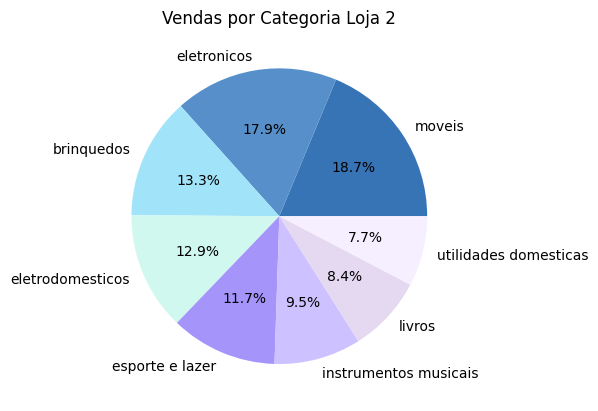

In [7]:
vendas_categoria_grafico(resultado_loja2, lojas[1])

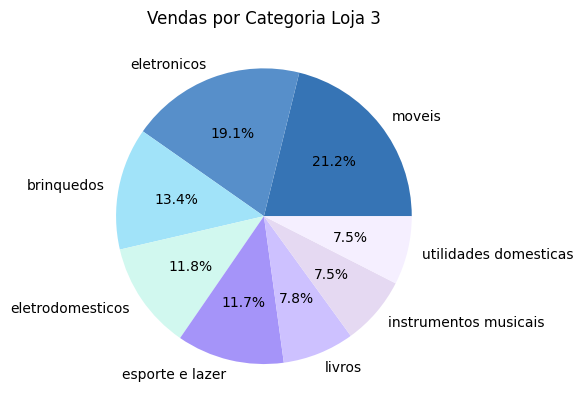

In [8]:
vendas_categoria_grafico(resultado_loja3, lojas[2])

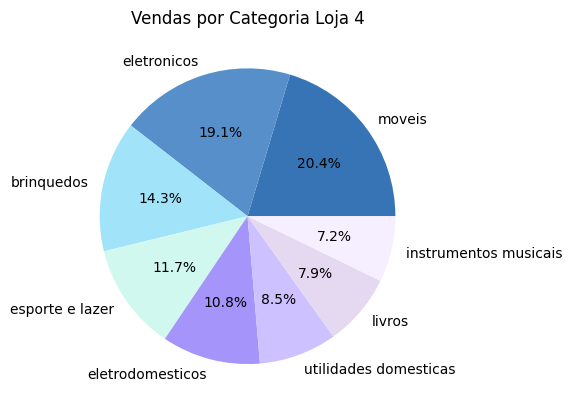

In [9]:
vendas_categoria_grafico(resultado_loja4, lojas[3])

# 3. Média de Avaliação das Lojas

In [22]:
media_avaliacoes_lista = []

def media_avaliacoes(parametro1):
  ''' Função que retorna a média de avaliação das lojas.

  parametro1: dataframe

  return media: float
    Um float que representa a média de avaliação das lojas.
  '''
  soma_avaliações = sum(parametro1['Avaliação da compra'])
  media = soma_avaliações / len(parametro1['Avaliação da compra'])
  return round(media, 2)

media_avaliacoes_lista.append(media_avaliacoes(loja))
media_avaliacoes_lista.append(media_avaliacoes(loja2))
media_avaliacoes_lista.append(media_avaliacoes(loja3))
media_avaliacoes_lista.append(media_avaliacoes(loja4))

print(media_avaliacoes_lista)
media_avaliacoes_geral = sum(media_avaliacoes_lista) / len(media_avaliacoes_lista)
print(f'A média de avaliação geral é de {media_avaliacoes_geral}')

[3.98, 4.04, 4.05, 4.0]
A média de avaliação geral é de 4.0175


# 4. Produtos Mais e Menos Vendidos

In [12]:
def popularidade_produtos(parametro1, parametro2):
  ''' Função que retorna o produto mais e menos vendido de cada loja.

  parametro1: dict resultado_loja (inserir o número da loja desejada)
  parametro2: list lojas[] (inserir o indice da loja desejada)

  return print
  '''
  produto_mais_vendido = max(parametro1, key=parametro1.get)
  produto_menos_vendido = min(parametro1, key=parametro1.get)

  print(f'Produto mais vendido {parametro2}: {produto_mais_vendido} com {parametro1[produto_mais_vendido]} vendas.')
  print(f'Produto menos vendido {parametro2}: {produto_menos_vendido} com {parametro1[produto_menos_vendido]} vendas.\n')

popularidade_produtos(resultado_loja, lojas[0])
popularidade_produtos(resultado_loja2, lojas[1])
popularidade_produtos(resultado_loja3, lojas[2])
popularidade_produtos(resultado_loja4, lojas[3])

Produto mais vendido Loja 1: moveis com 465 vendas.
Produto menos vendido Loja 1: utilidades domesticas com 171 vendas.

Produto mais vendido Loja 2: moveis com 442 vendas.
Produto menos vendido Loja 2: utilidades domesticas com 181 vendas.

Produto mais vendido Loja 3: moveis com 499 vendas.
Produto menos vendido Loja 3: instrumentos musicais com 177 vendas.

Produto mais vendido Loja 4: moveis com 480 vendas.
Produto menos vendido Loja 4: instrumentos musicais com 170 vendas.



# 5. Frete Médio por Loja


In [26]:
frete_medio_lista = []
def frete_medio(parametro1):
  ''' Função que retorna o frete médio de cada loja.

  parametro1: dataframe

  return media: float
    Um float que representa o frete médio de cada loja.
  '''
  soma_frete = sum(parametro1['Frete'])
  media = soma_frete / len(parametro1['Frete'])
  return round(media, 2)

frete_medio_lista.append(frete_medio(loja))
frete_medio_lista.append(frete_medio(loja2))
frete_medio_lista.append(frete_medio(loja3))
frete_medio_lista.append(frete_medio(loja4))

print(frete_medio_lista)

[34.69, 33.62, 33.07, 31.28]


#Relatório Final

O obejtivo do desafio é analisar dados das quatro lojas de Seu João e identificar qual loja tem menor desempenho e portanto deve ser a escolhida para ser vendida. Vamos analisar juntos, passo-a-passo.

#Faturamento Total das Lojas

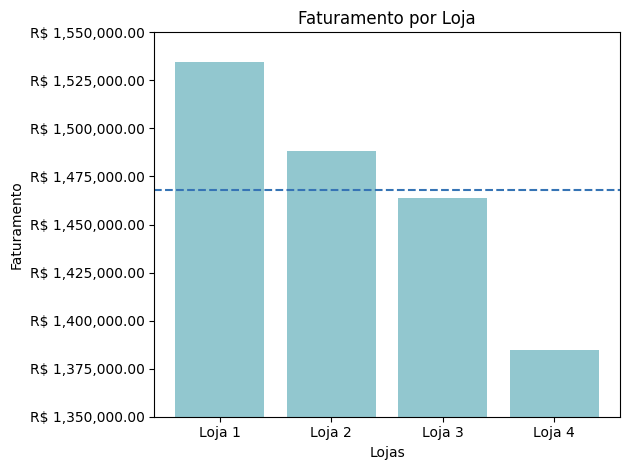

In [36]:
import matplotlib.ticker as ticker
plt.bar(lojas, faturamento_lojas_lista, color = '#92C7CF')
plt.axhline(y = media_faturamento, color = '#3674B5', linestyle='--')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
def formato_real(x, pos):
    return f'R$ {x:,.2f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))
plt.ylim(1350000, 1550000)
plt.tight_layout()
plt.show()

O gráfico apresenta o faturamento total por loja. Podemos observar que a loja que tem melhor desempenho é a Loja 1 e a com menor desempenho a Loja 4. A linha pontilhada representa uma média do faturamento de todas as lojas. Dessa forma conseguimos observar as lojas que ficam abaixo dessa média, sendo elas a Loja 3 e a Loja 4. Sendo assim, a Loja 4 além de apresentar menor desempenho em comparação com as outras, ela também fica bem abaixo da média do faturamento total.

# Média de Avaliações

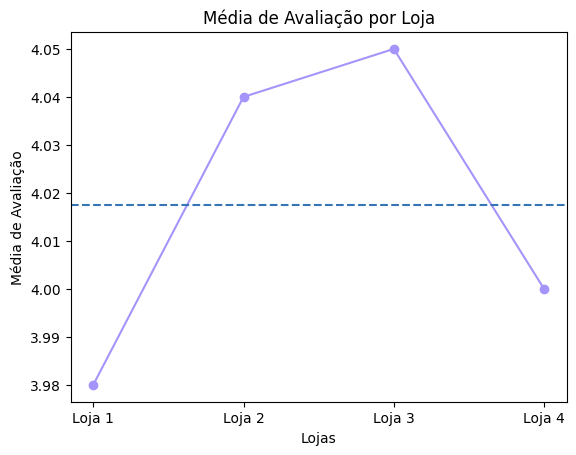

In [23]:
plt.plot(lojas, media_avaliacoes_lista, marker='o', color = '#A594F9')
plt.axhline(y = media_avaliacoes_geral, color = '#3674B5', linestyle='--')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.show()

O gráfico apresenta a média de avaliações de cada loja. Podemos observar que a Loja 1 tem a menor média de avaliação com 3.98, enquanto a melhor média é representada pela Loja 3 com 4.05. A Loja 4 tem uma média de 4.0, não representando grande diferença da Loja 1. A linha pontilhada representa a média de avaliações de todas as lojas, podendo assim ser observado que as Lojas 1 e 4 performam abaixo da média total.

# Frete Médio

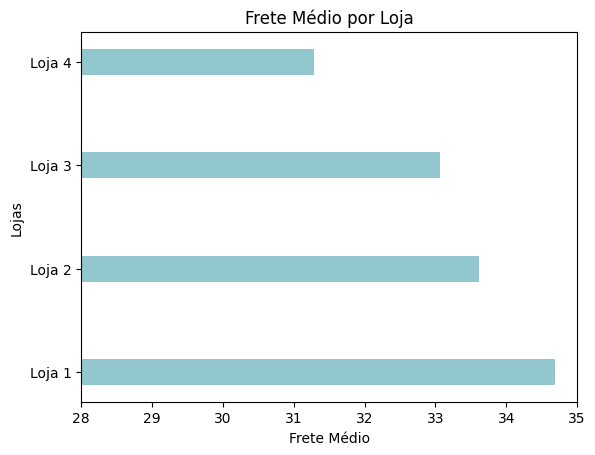

In [27]:
plt.barh(lojas, frete_medio_lista, color = '#92C7CF', height = 0.25)
plt.xlabel('Frete Médio')
plt.ylabel('Lojas')
plt.title('Frete Médio por Loja')
plt.xlim(28, 35)
plt.show()

O gráfico analisa o frete médio por loja, sendo possível observar que a Loja 1 possui o frete mais caro e a Loja 4 o frete mais barato.

#Conclusão
A Loja 4 apresenta o menor faturamento em relação a outras lojas e além disso performa com faturamento muito abaixo da média de faturamento geral.

A média de avaliações também não traz boas análises para a Loja 4, já que ela também performa abaixo da média geral. Apesar de sua média de avaliações ficar acima dos números da Loja 1 essa diferença é muito baixa, não gerando grande impacto na análise.

Ao analisar o frete médio por loja podemos observar que a Loja 4 performa bem por ter o frete mais baixo e a Loja 1 atinge o frete mais alto entre as lojas.

Além dos gráficos também temos a ánalise de vendas por categoria e produto mais e menos vendido pelas lojas, mas esses dados não trazem grandes insights para a nossa ánalise, pois todas as lojas performam de forma parecida.

Dessa forma, após análise dos gráficos e também de outros dados para além deles, podemos concluir que a loja que tem performance abaixo do esperado é a Loja 4. Mesmo que suas vendas por categoria performem pouco melhor e seu frete seja mais baixo, a Loja 4 performa muito mal em relação ao faturamento comparado as outras lojas. Ou seja, o fato de vender mais produtos e ter um frete melhor não tem impactos positivos no faturamento total da loja. Sendo assim, a Loja 4 se torna a escolha mais acertiva para o Seu João realizar a venda e investir no seu novo negócio.